In [5]:
%matplotlib inline


Introduction to PyTorch
============

PyTorch's tensor library
------------------------------------

The most of PyTorch operations are running on <b>tensors</b>.
A tensor is an multidimensional array.
Lets have a look on some basic tensor operations.
But first, lets import some important PyTorch libraries:
- <b>torch</b> - a Tensor library similar to NumPy, with strong GPU support
- <b>torch.autograd</b> - a "tape-based" (about this - later on) automatic differentiation library
- <b>torch.nn</b> - a neural networks library deeply integrated with autograd 
- <b>torch.optim</b> - an optimization package to be used with torch.nn with standard optimization methods such as SGD, RMSProp, LBFGS, Adam etc.


We also set a seed to be able to reproduce the same results later.



In [44]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(123)

Creating Tensors
----------------

Tensors can be created from Python lists with the <b>torch.Tensor()</b> function.




In [47]:
# Create a torch.Tensor object from python list
v = [1, 2, 3]
print(type(v))
v_tensor = torch.Tensor(v)
print(v_tensor)

# Create a torch.Tensor object of size 2x3 from 2x3 matrix
m2x3 = [[1, 2, 3], [4, 5, 6]]
m2x3_tensor = torch.Tensor(m2x3)
print(m2x3_tensor)

# Create a 3D torch.Tensor object of size 3x3x3.
m3x3x3 = [[[1, 2, 3], [4, 5, 6], [7, 8, 9]],
          [[10, 11, 12],[13, 14, 15], [16, 17, 18]],
            [[19, 20, 21],[22, 23, 24], [25, 26, 27]]]
m3x3x3_tensor = torch.Tensor(m3x3x3)
print(m3x3x3_tensor)

#Create a 4Dtensor from random data and given dimensions (in this case 3x4x5x6) with torch.randn()
m4x3x3x3_tensor = torch.randn((4, 3, 3, 3))
m4x3x3x3_tensor.shape
print(m4x3x3x3_tensor)

<type 'list'>

 1
 2
 3
[torch.FloatTensor of size 3]


 1  2  3
 4  5  6
[torch.FloatTensor of size 2x3]


(0 ,.,.) = 
   1   2   3
   4   5   6
   7   8   9

(1 ,.,.) = 
  10  11  12
  13  14  15
  16  17  18

(2 ,.,.) = 
  19  20  21
  22  23  24
  25  26  27
[torch.FloatTensor of size 3x3x3]


(0 ,0 ,.,.) = 
  0.4934 -0.2766  0.2439
 -1.2116 -0.1520  0.1509
 -0.6251 -0.4416  0.3208

(0 ,1 ,.,.) = 
 -0.3273 -0.5305 -0.0172
  0.4719  0.5671  2.7930
  0.3229  0.8552  0.7492

(0 ,2 ,.,.) = 
 -1.7119  0.6025 -0.7018
 -1.3130  0.1574  2.0114
  0.1004  0.8222 -0.0176

(1 ,0 ,.,.) = 
  1.2481 -0.0710  2.1627
  1.5215 -1.0547  1.7822
  1.9736 -0.3101 -0.8211

(1 ,1 ,.,.) = 
  0.1315 -0.6948 -0.5823
  1.0035 -1.4613  0.8985
  0.6210 -0.9679  0.6740

(1 ,2 ,.,.) = 
 -1.2828 -0.5097  0.1464
 -0.4860 -0.7529  1.6989
  0.4991 -2.1702  0.5130

(2 ,0 ,.,.) = 
 -1.9029  0.8260 -0.6644
  1.6663 -0.5704  1.3906
 -1.4855  0.2987 -0.3029

(2 ,1 ,.,.) = 
  0.3354  1.0599  0.1941
 -0.9295  0.5329 -1.1307

What is a multidimensional tensor?
-------------------
Since we frequently deal with n > 3 dimensional tensors, its understanding is very important. 
The best way to think of a higher (n) dimensional object (and tensor in particular) is as of a container which keeps a series of n-1 dimensional objects "inside" of it. We can "pull out" these "inner" objects by indexing in to higher dimensional tensor container.
Let's have a look on some examples:

- For a vector v (dim(v)=1), indexing into it ("pulling out of it") returns its "slice" - a scalar s (dim(s)=0). 

- For a matrix, indexing into it returns its "slice" - a (row or column) vector. 

- 3D tensor can be seen as a cube or 3D rectangular consisting of horizontally "stacked" matrices. So if we index into a such tensor it will give us its slice which is a matrix!

- We can't easily visualize 5D (or n-D) tensors, but the idea is actually the same. If we index in to them, we will pull out an object of dimension n-1.

- E.g. a 4D tensor can be seen as a list of cubes or 3D reactangulars. If we index in to a 4D tensor, we will get 3D rectangulars.

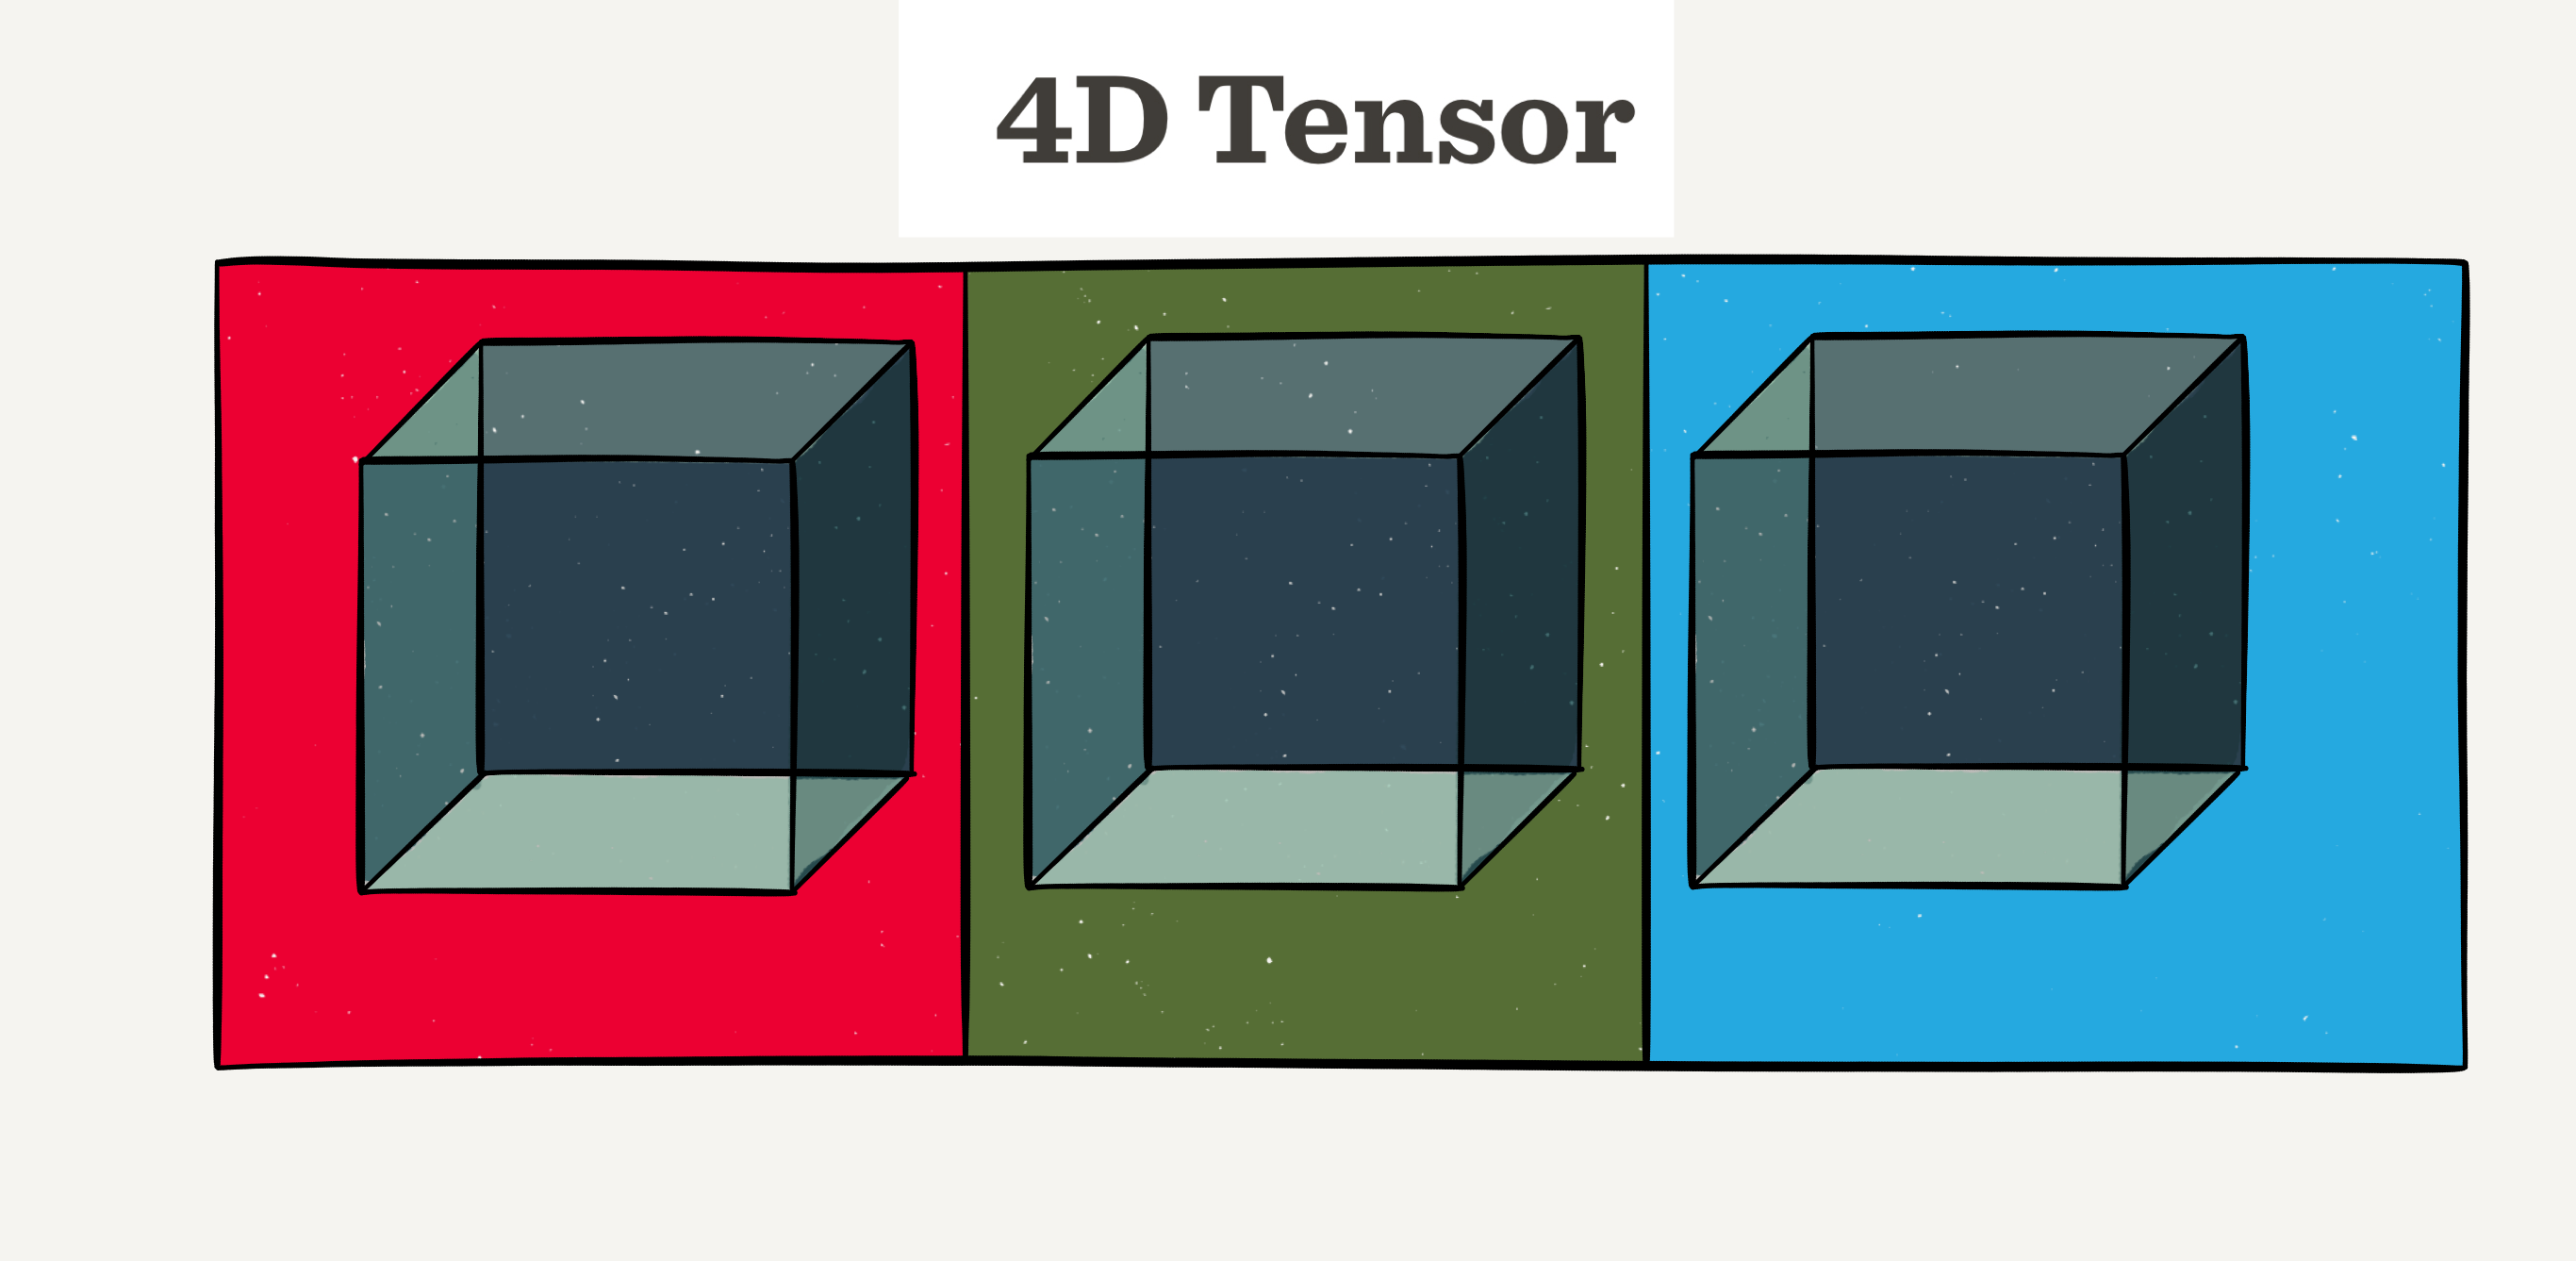


In [46]:
# Index into v_tensor and get a scalar
print(v_tensor[0])

# Index into m2x3_tensor and get a vector
print(m2x3_tensor[0])

# Index into m3x3x3_tensor and get a matrix
print(m3x3x3_tensor[0])

# Index into m4x3x3x3_tensor and get a 3D rectangular of size 4x5x6
print(m4x3x3x3_tensor[0])

1.0

 1
 2
 3
[torch.FloatTensor of size 3]


 1  2  3
 4  5  6
 7  8  9
[torch.FloatTensor of size 3x3]


(0 ,.,.) = 
 -0.1115  0.1204 -0.3696
 -0.2404 -1.1969  0.2093
 -0.9724 -0.7550  0.3239

(1 ,.,.) = 
 -0.1085  0.2103 -0.3908
  0.2350  0.6653  0.3528
  0.9728 -0.0386 -0.8861

(2 ,.,.) = 
 -0.4709 -0.4269 -0.0283
  1.4220 -0.3886 -0.8903
 -0.9601 -0.4087  1.0764
[torch.FloatTensor of size 3x3x3]



Operations with Tensors
----------------------

You can operate on tensors in the ways you would expect.
See the documentation <http://pytorch.org/docs/torch.html> for a complete list of operations.



Simple mathematical operations: <b>Addition, Multiplication</b>
                                     

In [76]:
x = torch.Tensor([1, 2, 3])
y = torch.Tensor([4, 5, 6])
print(x)
print(y)

w = torch.matmul(x, y)
print(w)


 1
 2
 3
[torch.FloatTensor of size 3]


 4
 5
 6
[torch.FloatTensor of size 3]

32.0


Helpful operation: <b>Concatenation</b>


In [78]:
# By default, it concatenates along the axis with 0 (rows). It's "stacking" the rows.

x_1 = torch.randn(2, 5)
print(x_1)
y_1 = torch.randn(3, 5)
print(y_1)
z_1 = torch.cat([x_1, y_1])
print(z_1)

# Concatenate columns:
x_2 = torch.randn(2, 3)
print(x_2)
y_2 = torch.randn(3, 5)
print(y_2)
# second arg specifies which axis to concat along. Here we select 1 (columns). It's attaching the columns.
z_2 = torch.cat([x_2, y_2], 1)
print(z_2)

# If your tensors are not compatible, torch will complain.  Uncomment to see the error
torch.cat([x_1, x_2])


 0.5374 -0.0899 -0.7969 -0.7968 -0.2611
 0.4808 -0.1458 -0.5357 -0.7330  2.3465
[torch.FloatTensor of size 2x5]


-0.4654  1.4965  2.7607 -1.4606  1.0825
-0.9363 -0.2594 -1.3465  0.5388  0.0382
-0.1434  1.4049  0.0889  0.5171 -0.0214
[torch.FloatTensor of size 3x5]


 0.5374 -0.0899 -0.7969 -0.7968 -0.2611
 0.4808 -0.1458 -0.5357 -0.7330  2.3465
-0.4654  1.4965  2.7607 -1.4606  1.0825
-0.9363 -0.2594 -1.3465  0.5388  0.0382
-0.1434  1.4049  0.0889  0.5171 -0.0214
[torch.FloatTensor of size 5x5]


-0.2001 -0.6503 -0.2019
 0.1262 -0.0708  1.4592
[torch.FloatTensor of size 2x3]


 0.5823  0.0048 -0.2069 -0.5939 -1.3076
 0.9156  0.3748 -1.3108 -2.6207 -1.2696
 0.9036 -1.3043  0.3300 -0.6928 -1.5125
[torch.FloatTensor of size 3x5]



RuntimeError: inconsistent tensor sizes at /pytorch/torch/lib/TH/generic/THTensorMath.c:2864

Reshaping Tensors
----------------

We can use the <code>.view()</code> method to reshape a tensor. Often we will need to reshape our data before passing it
to a neuronal network.

Let's assume we have 64000 RGB images with the size of 28x28 pixels.
We can define an array fo shape (64000, 3, 28, 28) to hold them, where 3 is number of color channels:


In [97]:
x = torch.randn(64000, 3, 28, 28)
# Now we want to add a batch dimension of size 32. We can then infer the second dimension by placing -1:
x_rehsaped = x.view(32, -1, 3, 28, 28)
print(x_rehsaped.shape)

torch.Size([32, 2000, 3, 28, 28])


Computation Graphs and Automatic Differentiation
---------------------------------------------

A computation graph is a specification of what parameters with which operations are involved in the computation to give the output. 

The fundamental class of Pytorch <code>autograd.Variable</code> keeps track of how it was created.


In [100]:
# Variables wrap tensor objects
x = autograd.Variable(torch.Tensor([1, 2, 3]), requires_grad=True)
# You can access the data with the .data attribute
print(x.data)

y = autograd.Variable(torch.Tensor([4, 5, 6]), requires_grad=True)

# With autograd.Variable you can also perform all the same operations you did with tensors
z = x + y
print(z.data)

#  w knows also that it's result of addition of z lements (AddBackward)
operation = z.grad_fn
print(operation)



 1
 2
 3
[torch.FloatTensor of size 3]


 5
 7
 9
[torch.FloatTensor of size 3]



The autograd.Variable knows which operation has created it. But how does that help <b>compute a gradient</b>?

In [101]:
# Lets sum up all the entries in z
s = z.sum()
print(s)
print(s.grad_fn)

Variable containing:
 21
[torch.FloatTensor of size 1]



Gradient
-------
So now, what is the derivative of this sum with respect to the first component of x? Remember, that x is a tensor of 3 elements: $x = (x_0, x_1, x_2)$

In math, we want a partial derivative of $s$ with respect to $x_0$: $\frac{\partial s}{\partial x_0}$

Well, $s$ knows that it was created as a $sum$ of the tensor $z$ elements $(z_0, z_1, z_2)$. $z$ knows
that it was the sum $x + y$. So

\begin{align}s = \overbrace{x_0 + y_0}^\text{$z_0$} + \overbrace{x_1 + y_1}^\text{$z_1$} + \overbrace{x_2 + y_2}^\text{$z_2$}\end{align}

And so $s$ contains enough information to determine that the derivative of $s$ with respect to $x_0$ is 1!

*Reminder:* If you compute the partial derivative with respekt to one variable, you handle all other variables as constants. Therefore they all $(x_1, x_2, y_0, y_1, y_2)$ get zeroes, and the derivative of $f(x_0) = x_0$ is 1.



First we need to run <b>backpropagation</b> and calculate gradients with respect to every variable.
*Note:* if you run <code>backward</code> multiple times, the gradient will increment.
That is because Pytorch *accumulates* the gradient into the <b>.grad
property</b>, since for many models this is very convenient.
Lets now have Pytorch compute the gradient, and see that we were right with our guess of 1:

In [106]:
# calling .backward() on any variable will run backprop, starting from it.
s.backward(retain_graph=True)


In [107]:
print(x)
print(x.grad)
print(y.grad)

Variable containing:
 1
 2
 3
[torch.FloatTensor of size 3]

Variable containing:
 3
 3
 3
[torch.FloatTensor of size 3]

Variable containing:
 3
 3
 3
[torch.FloatTensor of size 3]



How NOT to break the computational graph
----------------------------------




Let's create two torch tensors and add them up:

In [109]:
x = torch.randn((2, 2))
y = torch.randn((2, 2))
z = x + y  # These are Tensor types, and backprop would not be possible

print(z)




 0.1730  1.8913
 0.1251  0.1286
[torch.FloatTensor of size 2x2]



Now we wrap the torch tensors in <code>autograd.Variable</code>. The <code>var_z</code> contains the information for backpropagation:

In [111]:
var_x = autograd.Variable(x, requires_grad=True)
var_y = autograd.Variable(y, requires_grad=True)
# var_z contains enough information to compute gradients, as we saw above
var_z = var_x + var_y
print(var_z.grad_fn)

But what happens if we extract the wrapped tensor object out of <code>var_z</code> and re-wrap the tensor in a new <code>autograd.Variable</code>?

In [112]:
var_z_data = var_z.data
new_var_z = autograd.Variable(var_z_data)
print(new_var_z.grad_fn)

None


The variable chain is not existing anymore, since we have extracted only data and the whole operations chain was lost.
If we try now to compute <code>backward</code> on <code>new_var_z</code>, it will throw an error:



In [113]:
new_var_z.backward(retain_graph=True)

RuntimeError: element 0 of variables does not require grad and does not have a grad_fn

CUDA
----
Check wether GPU accelaration with **CUDA** is available

In [42]:
# let us run this cell only if CUDA is available
if torch.cuda.is_available():
    # creates a LongTensor and transfers it
    # to GPU as torch.cuda.LongTensor
    a = torch.LongTensor(10).fill_(3).cuda()
    print(type(a))
    b = a.cpu()
    # transfers it to CPU, back to
    # being a torch.LongTensor

Linear Model
=======

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

In [2]:
x = [i for i in range(20)] #list comprehention
x_train = np.array(x, dtype=np.float32)
x_train = x_train.reshape(-1, 1)
print(x)
print(x_train.shape)

y = [(5*i + 2) for i in x] #list comprehention
y_train = np.array(y, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
print(y)
print(y_train.shape)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
(20, 1)
[2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82, 87, 92, 97]
(20, 1)


Create Model Class
-----------------

In [6]:

class LinearRegressor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressor, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

input_dim = 1
output_dim = 1

model = LinearRegressor(input_dim, output_dim)

model

LinearRegressor(
  (linear): Linear(in_features=1, out_features=1)
)

Loss & Optimizer
---------------

In [7]:
loss_function = nn.MSELoss()


optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
optimizer
loss_function

MSELoss(
)

In [8]:
epochs = 500

for epoch in range(epochs):
    epoch += 1
    #Convert inputs and outputs to torch variable
    inputs = Variable(torch.from_numpy(x_train))
    
    real_outputs = Variable(torch.from_numpy(y_train))
    
    # Reset Gradients
    optimizer.zero_grad()
    
    # Forward - compute the output
    pred_outputs = model(inputs)
    
    # Loss
    loss = loss_function(pred_outputs, real_outputs)
    
    # Backword - compute gradients
    loss.backward()
    
    # Update parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 3330.96435547
epoch 2, loss 1881.8626709
epoch 3, loss 1063.4017334
epoch 4, loss 601.130065918
epoch 5, loss 340.03616333
epoch 6, loss 192.568328857
epoch 7, loss 109.277175903
epoch 8, loss 62.2333488464
epoch 9, loss 35.6621856689
epoch 10, loss 20.6541633606
epoch 11, loss 12.1769609451
epoch 12, loss 7.38844966888
epoch 13, loss 4.68333339691
epoch 14, loss 3.15493202209
epoch 15, loss 2.29113745689
epoch 16, loss 1.80271029472
epoch 17, loss 1.52630400658
epoch 18, loss 1.36964297295
epoch 19, loss 1.28061759472
epoch 20, loss 1.22979319096
epoch 21, loss 1.20054602623
epoch 22, loss 1.18348562717
epoch 23, loss 1.17330884933
epoch 24, loss 1.16701996326
epoch 25, loss 1.16292822361
epoch 26, loss 1.16007828712
epoch 27, loss 1.15793061256
epoch 28, loss 1.15617823601
epoch 29, loss 1.15465211868
epoch 30, loss 1.15325260162
epoch 31, loss 1.15192627907
epoch 32, loss 1.15064108372
epoch 33, loss 1.14937984943
epoch 34, loss 1.14813303947
epoch 35, loss 1.146894693